In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

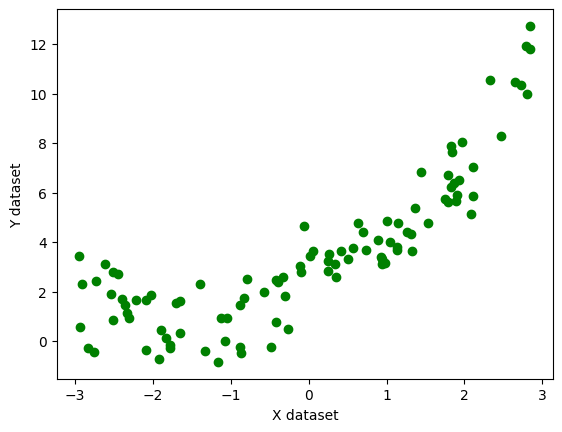

In [191]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.show()

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=61)

In [249]:
#lets implement simple LinearRegration
from sklearn.linear_model import LinearRegression

In [251]:
#regression model initialize
regression=LinearRegression()

In [253]:
#train the model
regression.fit(X_train,y_train)

LinearRegression()

In [255]:
y_pred=regression.predict(X_test)

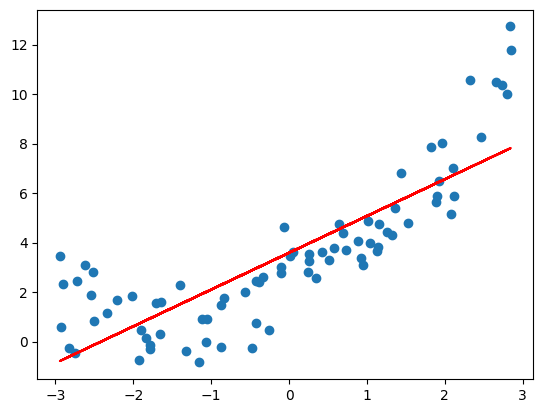

In [257]:
##let's visuvalize the model
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='r')
plt.show()

In [259]:
## check performance
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score=r2_score(y_test,regression.predict(X_test))
score

0.6826105749318736

In [142]:
#predication the train data
y_pred=regression.predict(X_train)

In [150]:
##let's check another factors 
mae=mean_absolute_error(y_train,y_pred)
mse=mean_squared_error(y_train,y_pred)
rmse=np.sqrt(mse)
print("mean squared error: ",mse)
print("mean absolut error: ",mae)
print("root mean squared error: ",rmse)


mean squared error:  2.8236030887891204
mean absolut error:  1.3800564897920622
root mean squared error:  1.6803580239904592


In [271]:
##let's apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [273]:
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)

In [275]:
##r2_score for poly
sscore=r2_score(y_test,y_pred)
sscore

0.8925594719499943

In [277]:
##check coefficient
regression.coef_

array([[0.        , 1.60584906, 0.48760933]])

In [279]:
##check intercept
regression.intercept_

array([2.20369803])

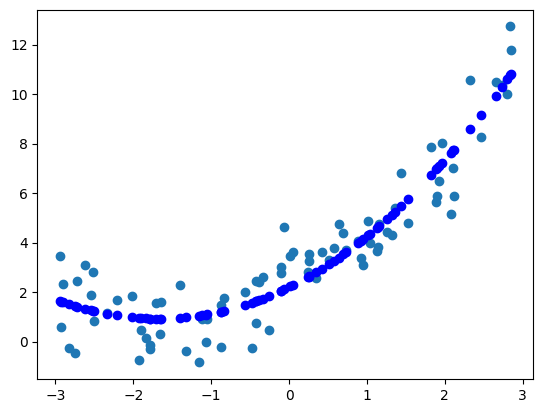

In [323]:
###let's visualize 
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color='b')
plt.show()

In [363]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly2=poly.fit_transform(X_train)
X_test_poly2=poly.fit_transform(X_test)

In [365]:
##  check performance
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
score

0.8953103781755327

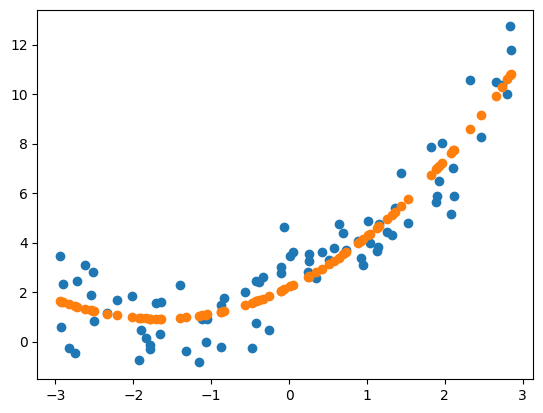

In [367]:
###let's visuvalize 
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly2))
plt.show()

In [371]:
### prediction of new data set
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

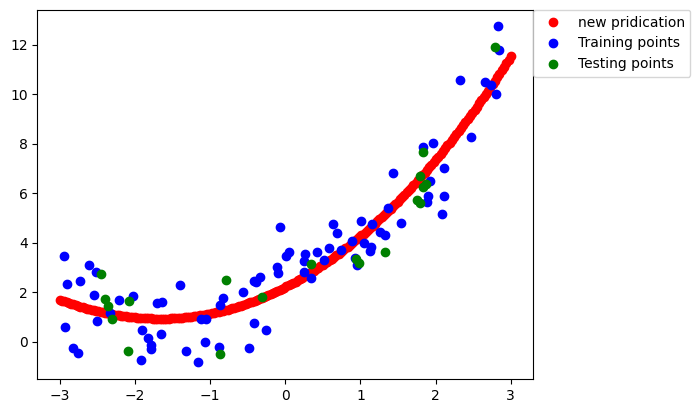

In [406]:
##let's visuvalize data
plt.scatter(X_new,regression.predict(X_new_poly),label='new pridication',color='r')
plt.scatter(X_train,y_train,label='Training points',color='b')
plt.scatter(X_test,y_test,label='Testing points',color='g')
plt.legend(loc=(1,0.819))
plt.show()